# Agglomerative Hierarchical Clustering
Agglomerative clustering is a type of hierarchical clustering that builds nested clusters by repeatedly merging pairs of clusters. It starts with each data point as its own cluster and merges the closest pairs of clusters step by step until all points are in one cluster or until certain criteria are met.

## Use Cases
- Customer segmentation
- Document clustering
- Image segmentation
- Anomaly detection

## Advantages
- Does not require specifying the number of clusters in advance
- Creates an interpretable dendrogram (tree-like diagram)
- Flexible in terms of distance metrics and linkage criteria

## Disadvantages
- Computationally intensive, especially for large datasets
- Sensitive to noise and outliers
- Can produce different results based on the chosen linkage method

# Import libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import unittest

# plot dendrogram

In [27]:
def plot_dendrogram(dataset, dataset_name):
    # Compute the linkage matrix
    Z = linkage(dataset, 'ward')
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram for {dataset_name}")
    dendrogram(Z)
    plt.show()


# hierarchical_clustering_and_plot

In [28]:
def hierarchical_clustering_and_plot(dataset, dataset_name, n_clusters=4, linkage='ward'):
    # Apply Agglomerative Hierarchical Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage= linkage )
    clustering.fit(dataset)

    # Plot the clustered data
    plt.figure(figsize=(10, 5))
    plt.scatter(dataset[:, 0], dataset[:, 1], c=clustering.labels_, cmap='rainbow')
    plt.title(f"Agglomerative Clustering for {dataset_name}")
    plt.show()
    
    # Evaluate the clustering
    silho_score = silhouette_score(dataset, clustering.labels_)
    print(f"Silhouette Score for {dataset_name}: {silho_score}")
    calinski_score = calinski_harabasz_score(dataset, clustering.labels_)
    print(f"calinski harabasz Score for {dataset_name}: {calinski_score}")
    davies_score = davies_bouldin_score(dataset, clustering.labels_)
    print(f"davies bouldin Score for {dataset_name}: {davies_score}")
    return dataset


# Using make_blobs

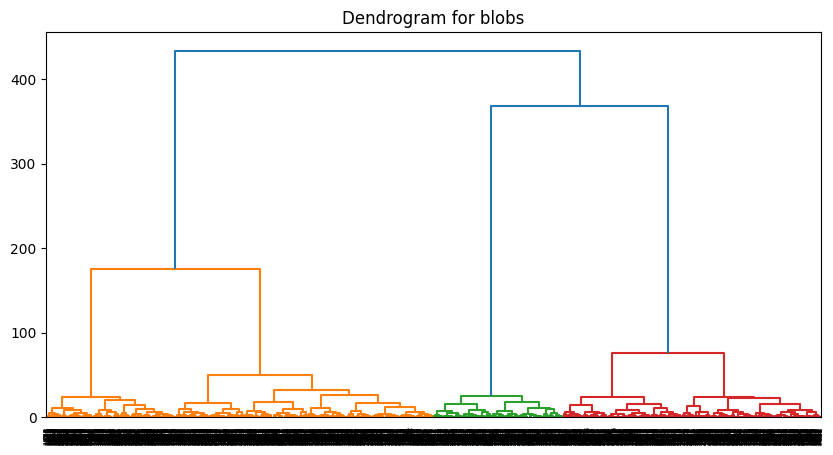

In [29]:
data_blobs, _ = make_blobs(n_samples=3000, centers=6, cluster_std=1, random_state=42)
plot_dendrogram(data_blobs,'blobs')

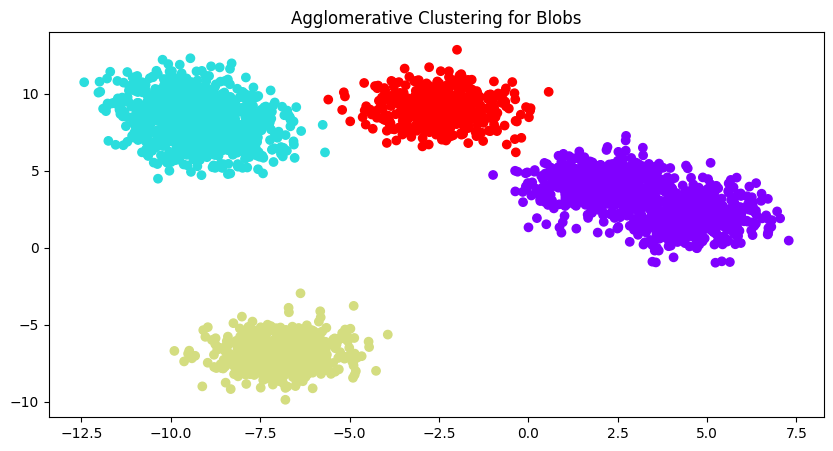

Silhouette Score for Blobs: 0.7118099400915351
calinski harabasz Score for Blobs: 17647.319744745077
davies bouldin Score for Blobs: 0.36481490896401836


In [30]:
labels_blobs = hierarchical_clustering_and_plot(data_blobs, 'Blobs', 4)

# Using make_moons

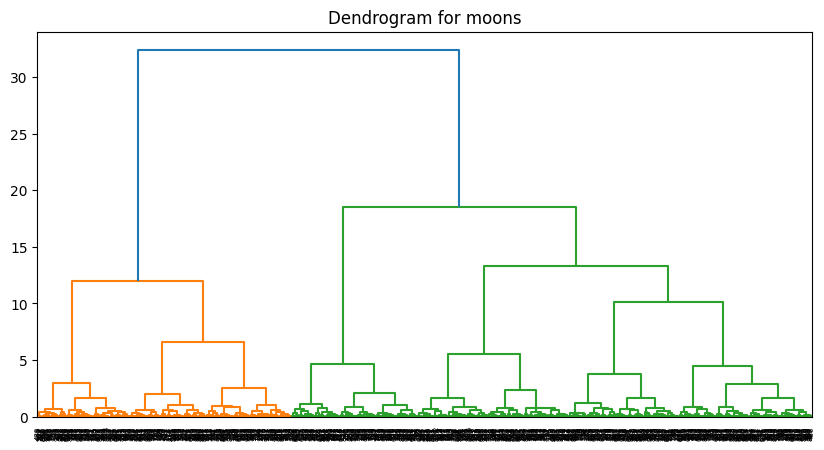

In [31]:
data_moons, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
plot_dendrogram(data_moons,'moons')

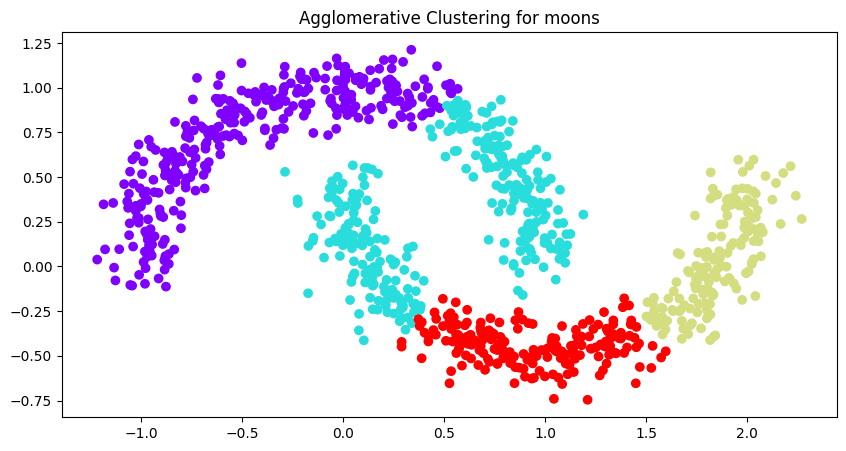

Silhouette Score for moons: 0.3954801795848605
calinski harabasz Score for moons: 1127.695046419854
davies bouldin Score for moons: 0.8856175958401319


In [32]:
labels_blobs = hierarchical_clustering_and_plot(data_moons, 'moons', 4)

# Using make_circles

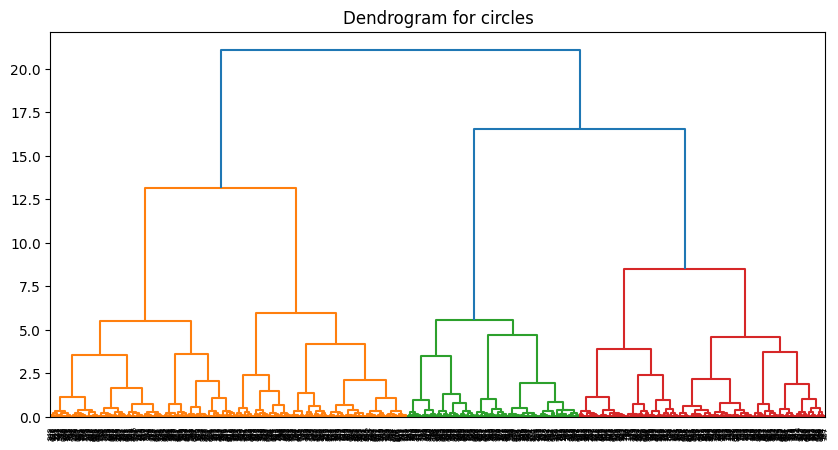

In [33]:
data_circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
plot_dendrogram(data_circles,'circles')

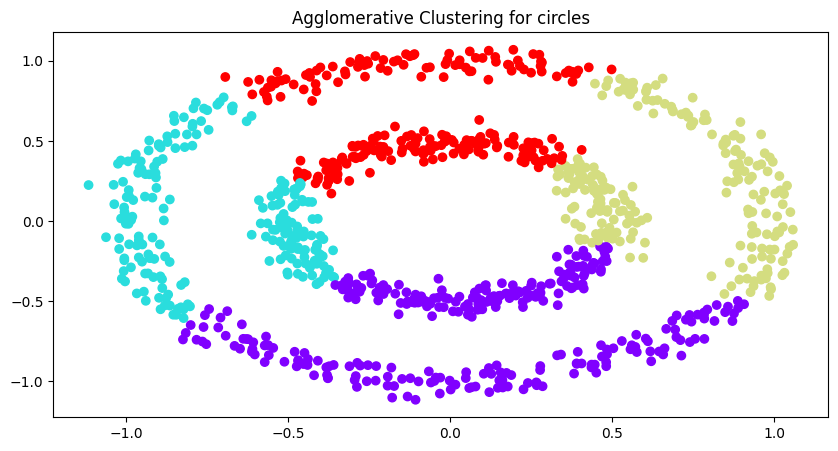

Silhouette Score for circles: 0.3576271816028496
calinski harabasz Score for circles: 814.4260547000124
davies bouldin Score for circles: 0.8367905791638071


In [34]:
labels_blobs = hierarchical_clustering_and_plot(data_circles, 'circles', 4)